# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [8]:
app_train['CNT_CHILDREN'].count()
a = app_train.groupby('CNT_CHILDREN')['TARGET'].count()
print(a)
app_train.groupby('CNT_CHILDREN').count()  #以家裡小孩的數量來分組

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
Name: TARGET, dtype: int64


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,,,,,,,,,,,,,,,,,,,,,
0,215371,215371,215371,215371,215371,215371,215371,215371,215359,215194,...,215371,215371,215371,215371,185323,185323,185323,185323,185323,185323
1,61119,61119,61119,61119,61119,61119,61119,61119,61119,61051,...,61119,61119,61119,61119,53362,53362,53362,53362,53362,53362
2,26749,26749,26749,26749,26749,26749,26749,26749,26749,26724,...,26749,26749,26749,26749,23583,23583,23583,23583,23583,23583
3,3717,3717,3717,3717,3717,3717,3717,3717,3717,3711,...,3717,3717,3717,3717,3258,3258,3258,3258,3258,3258
4,429,429,429,429,429,429,429,429,429,427,...,429,429,429,429,355,355,355,355,355,355
5,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,76,76,76,76,76,76
6,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,16,16,16,16,16,16
7,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,6,6,6,6,6,6
8,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [26]:
#1
"""
Your code here
"""

cut_rule = [0,1,3,5,20]  #定義之後分群的規則，這邊是依照小孩的數量
print(app_train['CNT_CHILDREN_GROUP'].values)

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()
#app_train['CNT_CHILDREN_GROUP'].head()

[(-0.001, 1.0], (-0.001, 1.0], (-0.001, 1.0], (-0.001, 1.0], (-0.001, 1.0], ..., (-0.001, 1.0], (-0.001, 1.0], (-0.001, 1.0], (-0.001, 1.0], (-0.001, 1.0]]
Length: 307511
Categories (4, interval[float64]): [(-0.001, 1.0] < (1.0, 3.0] < (3.0, 5.0] < (5.0, 20.0]]


(-0.001, 1.0]    276490
(1.0, 3.0]        30466
(3.0, 5.0]          513
(5.0, 20.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [28]:
app_train['CNT_CHILDREN_GROUP']

0         (-0.001, 1.0]
1         (-0.001, 1.0]
2         (-0.001, 1.0]
3         (-0.001, 1.0]
4         (-0.001, 1.0]
              ...      
307506    (-0.001, 1.0]
307507    (-0.001, 1.0]
307508    (-0.001, 1.0]
307509    (-0.001, 1.0]
307510    (-0.001, 1.0]
Name: CNT_CHILDREN_GROUP, Length: 307511, dtype: category
Categories (4, interval[float64]): [(-0.001, 1.0] < (1.0, 3.0] < (3.0, 5.0] < (5.0, 20.0]]

In [17]:
#2-1
"""
Your code here
"""
grp = app_train['CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
#print(grouped_df.head())
grouped_df.mean()

CNT_CHILDREN_GROUP
(-0.001, 1.0]    168361.253573
(1.0, 3.0]       172747.592085
(3.0, 5.0]       171293.508772
(5.0, 20.0]      147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

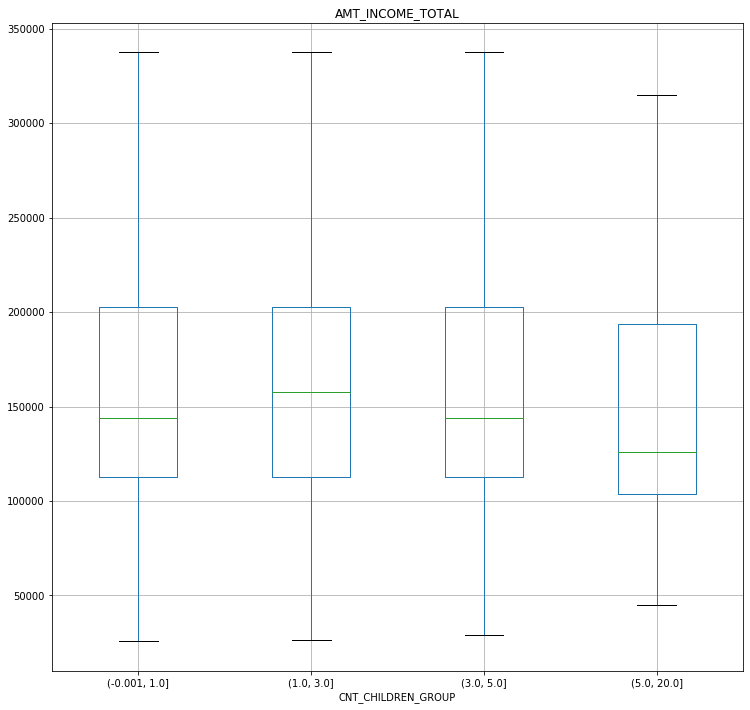

In [18]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = 'CNT_CHILDREN_GROUP'

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()  #這個圖是用來呈現，家裡小孩的數量跟他們的年收入平均

In [23]:
#3 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換]
"""
Your code here
"""
print(grouped_df.head())

app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean())/x.std())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

0        202500.0
1        270000.0
2         67500.0
3        135000.0
4        121500.0
24       135000.0
36       198000.0
53       225000.0
70       180000.0
72       225000.0
1133     121500.0
1721     112500.0
2348      67500.0
2666      45000.0
3079      85500.0
3448     135000.0
7204     157500.0
12615    112500.0
17516    315000.0
23881    180000.0
Name: AMT_INCOME_TOTAL, dtype: float64


,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.139137
1,270000.0,0.414243
2,67500.0,-0.411074
3,135000.0,-0.135968
4,121500.0,-0.190990
